Step 1: First, let's import all the necessary libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


Step 2: Loading the dataset!


In [2]:
ipl=pd.read_csv("ipl_data.csv")
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


Step 3: Data Pre-processing


In [3]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [4]:
#Further Pre-Processing
X = df.drop(['total'], axis =1)
y = df['total']


In [5]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [6]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Feature Scaling


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 4: Define the Neural Network


In [8]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression


Step 5: Model Training


In [9]:
model.fit(X_train_scaled,y_train,epochs=50, batch_size=64, validation_data=(X_test_scaled,y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 55.1681 - val_loss: 23.5080
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.3769 - val_loss: 22.8914
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.4640 - val_loss: 21.9410
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.2897 - val_loss: 21.9190
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.3742 - val_loss: 21.9577
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2794 - val_loss: 21.8483
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.3209 - val_loss: 22.3822
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.1981 - val_loss: 21.9027
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.0219 - val_loss: 22.2384
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.1576 - val_loss: 21.7797
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.1132 - val_loss: 22.3213
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

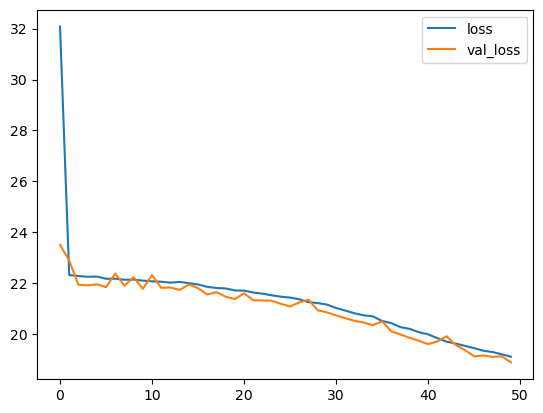

In [10]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


Step 6: Model Evaluation


In [11]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step


19.379954560590768

Step 7: Let's create an Interactive Widget


In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)


In [14]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()